# Gestion des valeurs aberrantes

La gestion des valeurs aberrantes, également appelées valeurs extrêmes, joue un rôle essentiel dans l'analyse exploratoire des données en contribuant à garantir la qualité et la fiabilité de nos conclusions. Les valeurs aberrantes sont des points de données qui diffèrent considérablement du reste de la distribution, pouvant résulter d'erreurs de mesure, de saisie incorrecte ou même refléter des phénomènes inhabituels. Leur présence peut fausser les statistiques descriptives et influencer les résultats des analyses. 

![valeur abérrange](./images/valeur_aberrante.png)

Il est crucial de les identifier et de les gérer de manière appropriée. Différentes approches, telles que la visualisation de boîtes à moustaches (box plots), les méthodes statistiques basées sur les écart-types, ou encore l'utilisation de méthodes plus avancées comme la détection d'anomalies par modèle, permettent de repérer ces valeurs. Une fois repérées, les valeurs aberrantes peuvent être traitées en les supprimant, en les remplaçant par des valeurs plausibles ou en utilisant des techniques de transformation. 

## 1. Détection des anomalies

### 1.1 Détection des anomalies grâce aux médianes

La détection d'anomalies basée sur les médianes constitue une approche efficace pour identifier des valeurs aberrantes dans les ensembles de données. En utilisant la médiane plutôt que la moyenne, cette méthode devient moins sensible aux valeurs extrêmes, ce qui en fait une approche plus robuste. Les valeurs qui s'écartent significativement de la médiane sont souvent considérées comme potentielles anomalies. Cette approche est particulièrement utile dans des situations où la présence d'anomalies pourrait fausser l'interprétation globale des données.

![mediane](./images/mediane.jpg)

In [1]:
import pandas as pd
import numpy as np
data = pd.Series([1.1,1.2,1.3,1.4,1.5,1.6,3.5])
data

0    1.1
1    1.2
2    1.3
3    1.4
4    1.5
5    1.6
6    3.5
dtype: float64

Calcule de la valeur de la médiane

In [2]:
mediane = np.median(data)
print("Mediane:",mediane)

Mediane: 1.4


Identification des valeurs aberrantes. Celles-ci seront disponibles dans le tableau "tab_anomalie".

In [3]:
seuil_autorise = 2
tab_anomalie=[]
for valeur in data:
    if abs(valeur - mediane) > seuil_autorise:
        tab_anomalie.append(valeur)
print(tab_anomalie)

[3.5]


### 1.2 Détection des anomalies grâce aux moyennes

La détection des anomalies à l'aide de la moyenne implique généralement le calcul de la moyenne et de l'écart-type des données. Les valeurs qui s'écartent considérablement de la moyenne par rapport à l'écart-type peuvent être considérées comme des anomalies. Par exemple, si l'écart-type est faible et une valeur se trouve à plusieurs écart-types de la moyenne, elle pourrait être identifiée comme une anomalie. Cependant, cette méthode est sensible aux valeurs extrêmes et peut ne pas fonctionner efficacement dans des distributions asymétriques ou avec des valeurs aberrantes sévères. Une approche plus robuste, comme l'utilisation de médianes et de méthodes basées sur les quartiles, peut être préférable pour gérer ces situations.
#### (Moyenne - Ecart_type)<= Valeur <=(Moyenne + Ecart_type)

In [4]:
moyenne=np.mean(data)
ecart_type=np.std(data)
print("Moyenne: ",moyenne)
print("Ecart type:",ecart_type)
tab_anomalie=[]
for valeur in data:
    if not((valeur<(moyenne-ecart_type)) or (valeur<(moyenne+ecart_type))):
        tab_anomalie.append(valeur)
print(tab_anomalie)

Moyenne:  1.657142857142857
Ecart type: 0.7687785169756406
[3.5]


### 1.3 Détection des anomalies grâce à la méthode Z-score

La détection des anomalies à l'aide de la z-score est une méthode courante pour identifier les valeurs aberrantes. La z-score mesure à quel point une valeur diffère de la moyenne d'un ensemble de données en termes d'écart-types. Une z-score élevée (positivement ou négativement) indique que la valeur est éloignée de la moyenne. Typiquement, on considère les valeurs ayant une z-score supérieure à un seuil donné (par exemple, 2 ou 3) comme des anomalies. Par exemple, si une z-score dépasse 3, cela peut suggérer qu'une valeur est nettement éloignée de la norme et peut être considérée comme une anomalie. Cependant, cette méthode repose sur l'hypothèse que les données suivent une distribution normale, ce qui peut ne pas toujours être le cas dans la pratique.

In [5]:
seuil_autorise = 2
moyenne=np.mean(data)
ecart_type=np.std(data)
print("Moyenne: ",moyenne)
print("Ecart type:",ecart_type)
tab_anomalie=[]
for valeur in data:
    z_score = (valeur - moyenne) / ecart_type
    if z_score > seuil_autorise:
        tab_anomalie.append(valeur)
print(tab_anomalie)

Moyenne:  1.657142857142857
Ecart type: 0.7687785169756406
[3.5]


### 1.4 Détection des anomalies grâce à l'écart interquartile IQR

La détection des anomalies à l'aide de l'écart interquartile (IQR) est une méthode robuste pour identifier les valeurs aberrantes dans un ensemble de données. L'IQR mesure la dispersion des valeurs au sein du premier et du troisième quartile de la distribution. Les valeurs situées en dehors d'une certaine plage définie par les quartiles sont considérées comme des anomalies. Par exemple, si Q1 est le premier quartile, Q3 est le troisième quartile et IQR est la différence entre eux (IQR = Q3 - Q1), alors les valeurs en dehors de l'intervalle [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] sont souvent identifiées comme des anomalies. Cette approche est particulièrement efficace pour détecter les valeurs aberrantes dans des distributions non normales ou en présence de valeurs extrêmes.

![IQR](./images/iqr.png)

In [6]:
Q1,Q3 = np.percentile(data,[25,75])
IQR= Q3 - Q1
print("Q1, Q3, IQR:",Q1,Q3,IQR)
tab_anomalie=[]
for valeur in data:
    if (valeur<(Q1 - 1.5 * IQR)) or (valeur>(Q3 + 1.5 * IQR)):
        tab_anomalie.append(valeur)
print(tab_anomalie)

Q1, Q3, IQR: 1.25 1.55 0.30000000000000004
[3.5]


{'whiskers': [<matplotlib.lines.Line2D at 0x1b8fd2f6770>,
 'caps': [<matplotlib.lines.Line2D at 0x1b8fd2f6cb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b8fd2f64d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b8fd2f71f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b8fd2f7490>],
 'means': []}

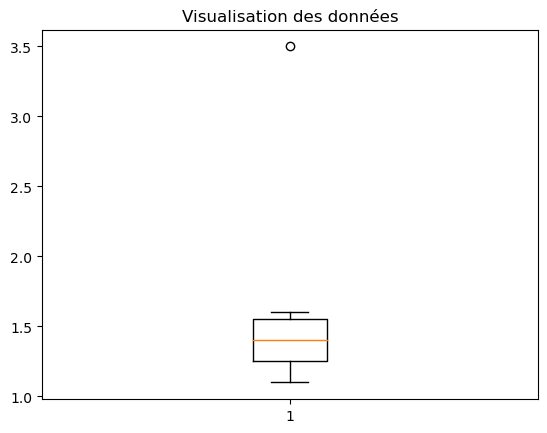

In [7]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.set_title('Visualisation des données')
ax1.boxplot(data)